<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/give_me_future_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [3]:
gold_df=yf.download(tickers='GC=F',interval='1d')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
from my_func_pkg import exp_change

In [5]:
closes=gold_df['Close'].values[:,0]

In [6]:
ret_g=exp_change(closes)

In [7]:
ret_g=exp_change(closes)

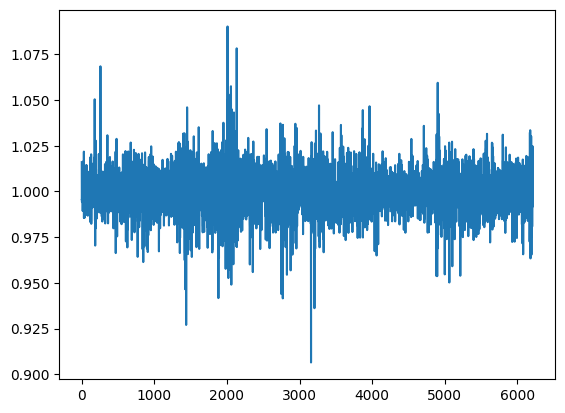

In [8]:
plt.plot(ret_g)

In [9]:
from my_func_pkg import build_data_for_auto_NN
from my_func_pkg import find_best_period_for_dependency

In [10]:
fbpfd=find_best_period_for_dependency(closes,overlay=False)

100%|██████████| 3102/3102 [16:45<00:00,  3.09it/s] 


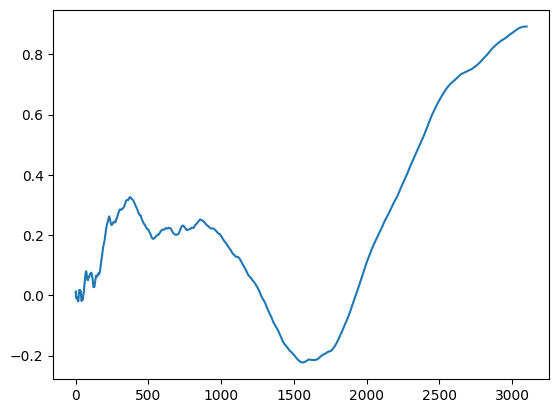

In [11]:
plt.plot(fbpfd)

In [12]:
fbpfdun=find_best_period_for_dependency(closes,overlay=True)

100%|██████████| 6208/6208 [34:27<00:00,  3.00it/s] 


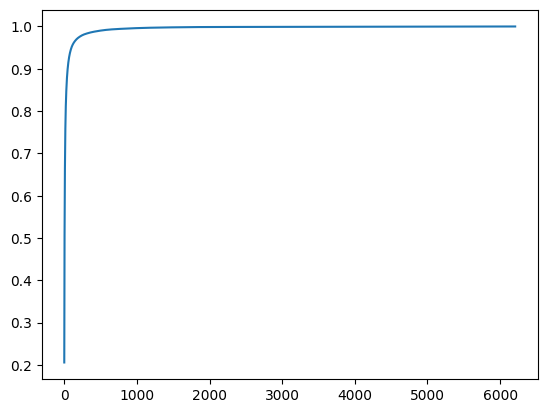

In [14]:
plt.plot(fbpfdun)

In [13]:
from my_func_pkg import find_pivot

In [16]:
fp=find_pivot(fbpfd)

In [18]:
fp

(array([  24,   70,  106,  230,  372,  640,  737,  855, 1606]),
 array([  40,  122,  248,  534,  691,  763, 1561, 1641]))

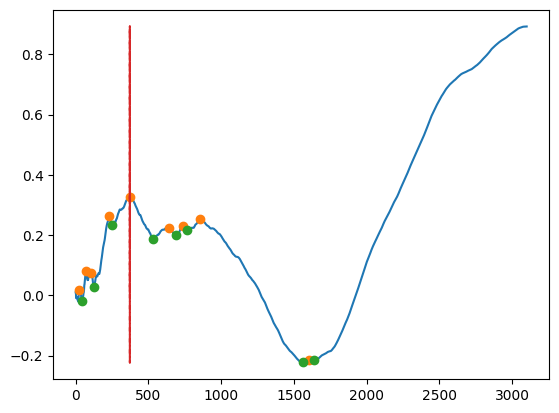

In [29]:
plt.plot(fbpfd)
plt.plot(fp[0],fbpfd[fp[0]],'o')
plt.plot(fp[1],fbpfd[fp[1]],'o')
plt.plot([372]*3102,fbpfd,'--')

In [34]:
def build_data_for_auto_NN(inp_data,len_x:int,len_y:int):
  ln=len(inp_data)
  x=[]
  y=[]
  for i in range(ln):
    if i+len_x<ln and i+len_x+len_y<ln:
      x.append(inp_data[i:i+len_x])
      y.append(inp_data[i+len_x:i+len_x+len_y])
  return np.array(x),np.array(y)

In [35]:
x,y=build_data_for_auto_NN(ret_g,372,30)

In [36]:
x.shape

(5810, 372)

In [37]:
x.reshape(x.shape[0],x.shape[1],1).shape

(5810, 372, 1)

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

In [41]:
model = models.Sequential([
    layers.LSTM(100, input_shape=(372,1)),
    layers.Dense(60),
    layers.Dense(30)  # خروجی با همان ابعاد ورودی
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [45]:
model.fit(x_train, y_train, epochs=16, batch_size=129)

Epoch 1/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 683ms/step - loss: 0.5206
Epoch 2/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 702ms/step - loss: 0.0033
Epoch 3/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 670ms/step - loss: 1.9391e-04
Epoch 4/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 680ms/step - loss: 1.2639e-04
Epoch 5/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 630ms/step - loss: 1.2795e-04
Epoch 6/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 650ms/step - loss: 1.2488e-04
Epoch 7/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 661ms/step - loss: 1.2598e-04
Epoch 8/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 742ms/step - loss: 1.2455e-04
Epoch 9/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 677ms/step - loss: 1.2259e-04
Epoch 10/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 649ms/step - loss: 1.2389e-04
Epoch 11/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 669ms/step - loss: 1.2345e-04
Epoch 12/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 626ms/step - loss: 1.2201e-04
Epoch 13/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 659ms/step - loss: 1.2796e-04
Epoch 14/16
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 1.2238

In [46]:
model.evaluate(x_test,y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 1.2273e-04


0.0001262273290194571

In [64]:
y_end=model.predict(x)

182/182 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step


In [59]:
def base_cenarios_by_given_future_dt(future_dt:np.ndarray,l_cenarios:int,base_dt:np.ndarray):
  b_cenarios=np.zeros((l_cenarios,))
  for j in range(l_cenarios):
      if j==0:
        b_cenarios[j]=base_dt[-1]*future_dt[0]
      else:
        b_cenarios[j]=b_cenarios[j-1]*future_dt[j]
  return b_cenarios

In [67]:
bc=base_cenarios_by_given_future_dt(y_end[-1],l_cenarios=30,base_dt=closes)

In [68]:
from my_func_pkg import most_frequency_cenarios

In [69]:
mfc=most_frequency_cenarios(closes,10,0.92,100,lcenarios=30)

100%|██████████| 100/100 [00:48<00:00,  2.05it/s]


In [70]:
mfc

array([3064.3896696 , 3179.22254926, 3294.05542891, 3408.88830857,
       3523.72118822, 3638.55406788])

In [74]:
bc

array([3383.06151956, 3395.32644682, 3409.76282392, 3427.47498964,
       3432.02869017, 3455.7749872 , 3471.39817648, 3483.03404908,
       3495.44135473, 3517.02459904, 3534.50363197, 3544.9546899 ,
       3551.57458621, 3558.281783  , 3565.79019749, 3578.32609363,
       3590.42361065, 3614.68888634, 3625.4434007 , 3636.88337821,
       3653.21651804, 3669.07602488, 3677.99392772, 3682.71034559,
       3702.61476887, 3712.86066385, 3717.20264325, 3730.30540892,
       3738.79937641, 3757.22816419])

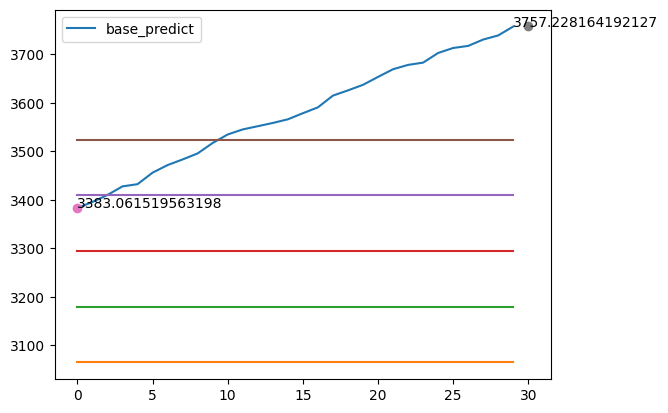

In [78]:
plt.plot(bc)
plt.plot([mfc[0]]*30)
plt.plot([mfc[1]]*30)
plt.plot([mfc[2]]*30)
plt.plot([mfc[3]]*30)
plt.plot([mfc[4]]*30)
plt.legend(['base_predict'])
plt.plot([0],[bc[0]],'o')
plt.text(x=0,y=bc[0],s=f'{bc[0]}')
plt.plot([30],[bc[-1]],'o')
plt.text(x=29,y=bc[-1],s=f'{bc[-1]}')
plt.show()
